In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
iris=load_iris()

In [3]:
X=iris.data
Y=iris.target

In [4]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [5]:
#查看累积可解释方差贡献率曲线
import numpy as np
pca_line=PCA().fit(X)
pca_line.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Text(0, 0.5, 'cumulative explained variance')

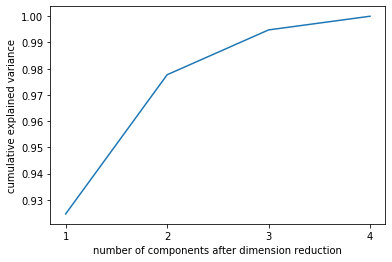

In [6]:
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance")
#由结果可知，二维、三维都可，这里选二维（好画图）

Text(0.5, 1.0, 'PCA of IRIS dataset')

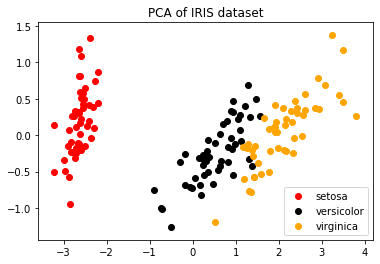

In [13]:
#现在画降维后的data-target图
pca=PCA(n_components=2)
pca=pca.fit(X)
X_dr=pca.transform(X)
plt.figure()
plt.scatter(X_dr[Y==0, 0], X_dr[Y==0, 1], c="red", label=iris.target_names[0])
plt.scatter(X_dr[Y==1, 0], X_dr[Y==1, 1], c="black", label=iris.target_names[1])
plt.scatter(X_dr[Y==2, 0], X_dr[Y==2, 1], c="orange", label=iris.target_names[2])
plt.legend()
plt.title('PCA of IRIS dataset')

In [14]:
#最大似然估计自选超参数
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)
X_mle
#代码给出的结果是3维

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [16]:
pca_f = PCA(n_components=0.97,svd_solver="full")
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)
print(pca_f.explained_variance_ratio_)
#0.97 二维

pca_f = PCA(n_components=0.99,svd_solver="full")
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)
print(pca_f.explained_variance_ratio_)
#0.99 三维

[0.92461872 0.05306648]
[0.92461872 0.05306648 0.01710261]


# 现在对红酒数据进行降维

In [7]:
from sklearn.datasets import load_wine
wine=load_wine()
X1=wine.data
Y1=wine.target
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [8]:
#由于红酒数据集data有13列，所以生成一个[1-13]的列表
def createList():
    L = []
    for i in range(1,14):
        L = L + [i]
    return L
list_line1=createList()
print(list_line1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [9]:
#查看累积可解释方差贡献率曲线
import numpy as np
pca_line1=PCA().fit(X1)
pca_line1.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

Text(0, 0.5, 'cumulative explained variance')

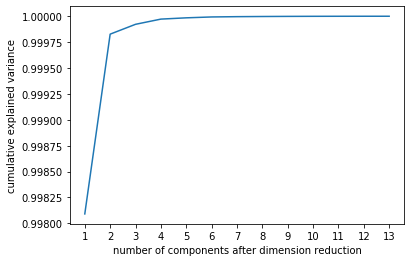

In [10]:
plt.plot(list_line1,np.cumsum(pca_line1.explained_variance_ratio_))
plt.xticks(list_line1) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance")
#由结果可知，二维、三维都可，这里选二维（好画图）

In [11]:
pca1=PCA(n_components=2)
pca1=pca1.fit(X1)
X_dr1=pca1.transform(X1)
X_dr1

array([[ 3.18562979e+02,  2.14921307e+01],
       [ 3.03097420e+02, -5.36471768e+00],
       [ 4.38061133e+02, -6.53730945e+00],
       [ 7.33240139e+02,  1.92729032e-01],
       [-1.15714285e+01,  1.84899946e+01],
       [ 7.03231192e+02, -3.32158674e-01],
       [ 5.42971581e+02, -1.35189666e+01],
       [ 5.48401860e+02,  1.14494324e+01],
       [ 2.98036863e+02, -8.18015784e+00],
       [ 2.98049553e+02, -7.10154294e+00],
       [ 7.63079712e+02, -8.33431723e+00],
       [ 5.32943228e+02, -1.42876338e+01],
       [ 5.72834410e+02, -2.10050143e+01],
       [ 4.02925358e+02, -1.61026352e+01],
       [ 8.00053394e+02, -1.21184472e+01],
       [ 5.63245578e+02,  2.21482866e+00],
       [ 5.33379651e+02,  1.08048022e+01],
       [ 3.83317591e+02,  8.47741982e+00],
       [ 9.33118387e+02, -8.35447844e+00],
       [ 9.84031775e+01,  1.43926594e+01],
       [ 3.35935940e+01,  2.55679565e+01],
       [ 2.31464375e+01,  1.81747309e+00],
       [ 2.88093030e+02, -3.96304175e+00],
       [ 2.

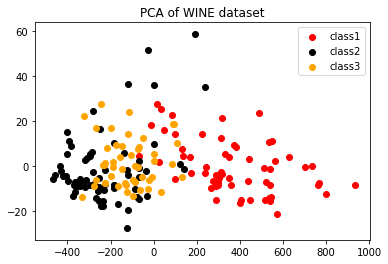

In [12]:
plt.figure()
plt.scatter(X_dr1[Y1==0, 0], X_dr1[Y1==0, 1], c="red",label="class1")
plt.scatter(X_dr1[Y1==1, 0], X_dr1[Y1==1, 1], c="black",label="class2")
plt.scatter(X_dr1[Y1==2, 0], X_dr1[Y1==2, 1], c="orange",label="class3")
plt.legend()
plt.title('PCA of WINE dataset')
plt.show()

In [13]:
#最大似然估计自选超参数
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(X1)
X_mle = pca_mle.transform(X1)
X_mle
#很多维

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00, ...,
        -9.50075663e-02,  8.87340044e-02, -3.85475626e-02],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00, ...,
        -4.57819758e-02,  3.97781862e-02, -5.71915771e-02],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00, ...,
        -2.08959774e-01,  2.37770027e-01, -4.87978751e-02],
       ...,
       [ 8.84580737e+01,  1.87762846e+01, -2.23757651e+00, ...,
        -4.53356039e-02, -2.23049341e-01,  9.60485020e-02],
       [ 9.34562419e+01,  1.86708191e+01, -1.78839152e+00, ...,
         5.92107103e-02, -3.04078323e-02, -5.20893107e-02],
       [-1.86943190e+02, -2.13330803e-01, -5.63050984e+00, ...,
         2.99079952e-01,  1.60725068e-01,  3.19201764e-02]])

In [14]:
pca_f = PCA(n_components=0.99,svd_solver="full")
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)
pca_f.explained_variance_ratio_
#0.99 三维

array([0.92461872, 0.05306648, 0.01710261])